# Signal

In this notebook we want to estimate the theoretical limit of the signal-to-noise ratio.

In [39]:
using Unitful
using Plots
using PlotThemes

theme(:juno)

### Signal-to-noise ratio

We define the signal-to-noise ratio (SNR) of a signal $s$ as,
$$
\text{SNR}_s=\frac{\overline{s}^2}{\sigma^2_s},
$$
wherein $\overline{s}$ denotes the mean of the signal and $\sigma^2_s$ its variance. Usually $\text{SNR}_s$ is unitless, however, we can express the SNR also in decibels,
$$
10\log\text{SNR}_s,
$$
which is more easier to work with in practice. For $\text{SNR}_s$ greater than 0 dB the signal contains more signal than noise.

### Fixed-point arthimetic

As a first application of the SNR we will estimate the SNR due to fixed-point arthimetic precision. At one point we need to sample the signal via analog-to-digital converter (ADC). Typical ADC have 8, 12 and 16 bit precision. The SNR due to finite precision of fixed-point arthimetic is given by,
$$
\text{SNR}_{fp}\approx6.02p,
$$
wherein $p$ denotes the precision.

| Precision | 8 bit | 12 bit | 16 bit |
| --------- | ----- | ------ | ------ |
| SNR       | 48 dB | 72 dB  | 96 dB  |

## Optical signal

In the following part we discuss the noise present in the optical signal.

### Photon shot noise

As our position-sensitive device will only be used with optical signals from a laser source we will limit this section to coherent light.

In this case the number of photons incident in the time interval $[0,t]$ can be described by a Poisson process. The probability of exactly $n$ photons hitting the detector is,
$$
p_n(t)=\frac{(\mu t)^n}{n!}e^{-\mu t},
$$
wherein $\mu$ is the photon rate. The photon rate relates to the power of the optical signal $P$ and the wavelength $\lambda$ through,
$$
\mu=\frac{P}{hc}\lambda.
$$
For a Poisson process we have $\overline{n}(t)=\mu t$ and variance $\sigma^2_n(t)=\mu t$. Henceforth the signal-to-noise ratio is given by,
$$
\text{SNR}_n=\frac{\overline{n}^2}{\sigma^2_n}=\frac{(\mu t)^2}{\mu t}=\mu t=\frac{P\lambda}{hc}t.
$$
$\text{SNR}_n$ obviously improves the longer we measure --- or equivalently --- decreases for higher frequency resolution. For practical applications this is the more interesting dependency. We will use $B=1/t$ as the bandwidth, thus,
$$
\text{SNR}_n=\frac{P\lambda}{Bhc}.
$$

In [4]:
function SNR_n(P::Unitful.Power, λ::Unitful.Length, B::Unitful.Frequency)
    h = Unitful.h
    c = Unitful.c

    return 10 * log10(upreferred(P * λ / (B * h * c)))
end

SNR_n(100u"μW", 454u"nm", 10u"kHz")

103.58979127706394

An optical signal of power 100 μW, wavelength 454 nm detected with a bandwidth of 10 kHz yields a SNR of about 100 dB. Optical signals of higher power or wavelength will yield a greater SNR, thus we can take 100 dB as upper bound for photon shot noise limited SNR.

### Background light

In addition to the statistical nature of the photons we have background light registered by the detector. In the table below we summarized the mean background light measured in the laboratory.

| Lights | 1070 nm | 532 nm | 456 nm |
| ------ | ------- | ------ | ------ |
| on     | 152 μW  | 182 μW | 232 μW |
| off    | 130 nW  | 160 nW | 280 nW |

The position-sensitive detector saturates at 500 μA photo current. Using the sensitivity $S(\lambda)$ that converts optical power to photo current, we find that the saturation powers below.

| Wavelength | 450 nm  | 550 nm  | 1050 nm |
| ---------- | ------- | ------- | ------- |
| Sat. power | 2000 μW | 1430 μW | 1250 μW |

In [5]:
10 * log10(2000 / 152), 10 * log10(1430 / 182), 10 * log10(1250 / 232)

(11.191864077192086, 8.95264649479987, 7.3142202811715675)

In [6]:
10 * log10(2000 / 0.13), 10 * log10(1430 / 0.16), 10 * log10(1250 / 0.28)

(41.87086643357144, 39.512160548091366, 36.497519816658375)

The SNRs of the optical signal subject to background light are given below.

| Lights | 450 nm  | 550 nm  | 1050 nm |
| ------ | ------- | ------- | ------- |
| on     | 11 dB   | 9 dB    | 7 dB    |
| off    | 42 dB   | 40 dB   | 36 dB   |

These values only give a lower bound on the SNRs as the photodiode will be subject to saturation and our usual optical signal will be of less power.

That said we can treat these as worst case SNRs. The laboratory background light is homogeneous over the small area of our position-sensitive detector, therefore, its mean power should not contribute to the position as we consider differences between the output anodes of the photodiode. A more important quantity we should consider is the standard deviation of the background light. We conducted 30 s measurements of the background light with an optical power meter at each of the given wavelengths. The standard deviations are listed below.

| Lights | 450 nm  | 550 nm  | 1050 nm |
| ------ | ------- | ------- | ------- |
| on     | 0.6 μW  | 0.6 μW  | 1.9 μW  |
| off    | 3.6 nW  | 0.5 nW  | 1.5 nW  |

In [7]:
10 * log10(2000 / 0.6), 10 * log10(1430 / 0.6), 10 * log10(1250 / 1.9)

(35.228787452803374, 33.77184787081418, 28.181564120552274)

In [8]:
10 * log10(2000 / 3.6e-3), 10 * log10(1430 / 0.5e-3), 10 * log10(1250 / 1.5e-3)

(57.447274948966935, 64.56366033129042, 59.20818753952375)

Using an optical signal close to saturation power of the photodiode and the measured deviation of background light we find the SNRs to be:

| Lights | 450 nm  | 550 nm  | 1050 nm |
| ------ | ------- | ------- | ------- |
| on     | 35 dB   | 34 dB   | 28 dB   |
| off    | 57 dB   | 65 dB   | 59 dB   |

The datasheet of the S5990 reports a typical spatial resolution of 0.7 μm at a photo current of 1 μA. Let's discuss how the background light noise behaves under these circumstances.

| Wavelength | 450 nm  | 550 nm  | 1050 nm |
| ---------- | ------- | ------- | ------- |
| Opt. power | 4 μW    | 3 μW    | 2 μW    |

In [9]:
10 * log10(4 / 0.6), 10 * log10(3 / 0.6), 10 * log10(2 / 1.9)

(8.239087409443188, 6.989700043360188, 0.2227639471115221)

In [10]:
10 * log10(4 / 3.6e-3), 10 * log10(3 / 0.5e-3), 10 * log10(2 / 1.5e-3)

(30.45757490560675, 37.78151250383643, 31.249387366083)

The SNR for a photo current of 1 μA where we expect the detector to have the highest spatial resolution given the background light noise are listed below.

| Lights | 450 nm  | 550 nm  | 1050 nm |
| ------ | ------- | ------- | ------- |
| on     | 8 dB    | 7 dB    | 0 dB    |
| off    | 30 dB   | 38 dB   | 31 dB   |

Under lights on condition we will not be able to get any useful signal of at 1050 nm wavelength. We should therefore at least use some type cover around the detector or a neutral-density (ND) filter.

## Electronic signal

The discussions of the previous part were limited to the optical signal. Due to the interaction of the photons with the photodiode electron-hole pairs are created. The conversion of a photon to an electron is usually determined by the quantum efficiency (QE). Given a QE characteristic for the photodiode and wavelength $0<\eta(\lambda)<1$, the SNR of the signal due to photon shot noise is given by,
$$
\text{SNR}_m=\eta \frac{P\lambda}{Bhc}.
$$
In the case of our position-sensitive detector we are not given a QE but a sensitivity $S(\lambda)$ which directly relates the power of the optical signal to the electric current, i.e.
$$
I_\text{photo}=S(\lambda)P.
$$
Then the SNR reads,
$$
SNR_m=\frac{S(\lambda)P}{e_0B},
$$
with $e_0$ being the electric charge.

In [178]:
function SNR_m(S::typeof(1.0u"A/W"), P::Unitful.Power, B::Unitful.Frequency)
    e0 = Unitful.q
    
    return 10 * log10(upreferred(S * P / (B * e0))) 
end

SNR_m (generic function with 1 method)

The datasheet of the S5990 photodiode gives a diagram of $S(\lambda)$. We extract the usual values here.

| Wavelength  | 450 nm   | 550 nm   | 1050 nm |
| ----------- | -------- | -------- | ------- |
| Sensitivity | 0.25 A/W | 0.35 A/W | 0.4 A/W |

In [77]:
SNR_m(0.25u"A/W", 100u"μW", 10u"kHz"), SNR_m(0.35u"A/W", 100u"μW", 10u"kHz"), SNR_m(0.4u"A/W", 100u"μW", 10u"kHz")

(101.93229618515113, 103.39357654193351, 103.97349601171038)

So in fact the SNR does of the signal does not change itself and remains at about 100 dB.

### Photodiode

Up until now we assumed a perfect photodiode. Noise contributions due to imperfections include thermal (Johnson-Nyquist) and current shot noise.

#### Current shot noise

Current shot noise stems from the discrete nature of the charge and thereto can be trated analogue to the photon shot noise we discussed earlier. The variance of current shot noise is given by,
$$
\sigma^2=2e_0IB.
$$
In a photodiode we have two types of current: Photo current $I_\text{photo}$ due to electron-hole excitations by photons and dark current $I_\text{dark}$ due to thermal excitation of electron-holes.
$$
\begin{aligned}
\sigma_\text{photo}^2=2e_0I_\text{photo}B &&
\sigma_\text{dark}^2=2e_0I_\text{dark}B
\end{aligned}
$$

In [34]:
function shot_noise_current(I::Unitful.Current, B::Unitful.Frequency)
    e0 = Unitful.q
    
    return upreferred(sqrt(2 * e0 * I * B))
end

shot_noise_current (generic function with 1 method)

In [15]:
shot_noise_current(1u"μA", 10u"kHz"), shot_noise_current(500u"μA", 10u"kHz")

(5.660700700090051e-11 A, 1.2657711565682004e-9 A)

In [14]:
shot_noise_current(100u"pA", 10u"kHz"), shot_noise_current(500u"pA", 10u"kHz"), shot_noise_current(10u"nA", 10u"kHz")

(5.660700700090052e-13 A, 1.2657711565682006e-12 A, 5.6607007000900515e-12 A)

#### Thermal (Johnson-Nyquist) noise

Due to the resistance of the photodiode there will be heat dissipation which according to the fluctuation-dissipation theorem causes current variation of,
$$
\sigma^2_\text{thermal}=\frac{4k_BT}{RB},
$$
wherein $k_B$ is the Boltzmann constant, $T$ the temperature and $R$ the resistance of the photodiode.

In [33]:
function thermal_noise_current(T::Unitful.Temperature, R::Unitful.ElectricalResistance, B::Unitful.Frequency)
    kB = Unitful.k
    T = uconvert(u"K", T)
    
    return upreferred(sqrt(4 * kB * T * B / R))
end

thermal_noise_current (generic function with 1 method)

In [17]:
thermal_noise_current(23u"°C", 5u"kΩ", 10u"kHz"), thermal_noise_current(23u"°C", 7u"kΩ", 10u"kHz"), thermal_noise_current(23u"°C", 15u"kΩ", 10u"kHz")

(1.808599589069952e-10 A, 1.5285456378027166e-10 A, 1.0441954596057833e-10 A)

We summarize the current noises below.

| Source           | Min    | Max    |
| ---------------- | ------ | ------ |
| Thermal noise    | 0.1 nA | 0.2 nA |
| Dark shot noise  | 0.6 pA | 6 pA   |
| Photo shot noise | 0.6 pA | 1.3 nA |

We use linear interpolation to give the photo shot noise dependency on the photo current. For thermal and dark shot noise we use the maximum value as upper bound.

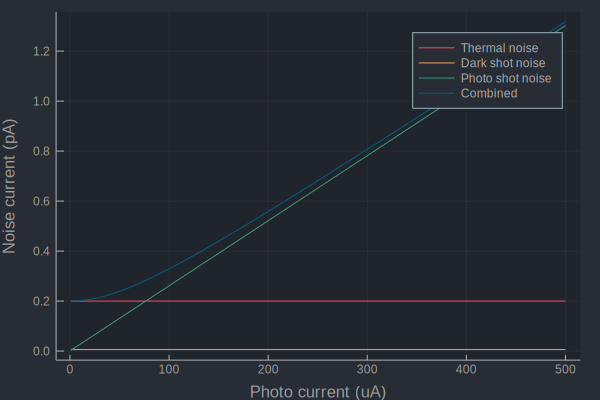

In [60]:
x = (1:500) .* 1e-6
y1 = 0.2e-9 .* ones(length(x))
y2 = 6e-12 .* ones(length(x))
y3 = 0.6e-12 .+ (1.3e-9 - 0.6e-12) / (maximum(x) - minimum(x)) .* x

plot(x ./ 1e-6, [y1 ./ 1e-9, y2 ./ 1e-9, y3 ./ 1e-9, sqrt.(y1.^2 + y2.^2 + y3.^2) ./ 1e-9], label=["Thermal noise", "Dark shot noise", "Photo shot noise", "Combined"])

xlabel!("Photo current (uA)")
ylabel!("Noise current (pA)")

We will drop the dark current shot noise as it is neglectable by magnitude.

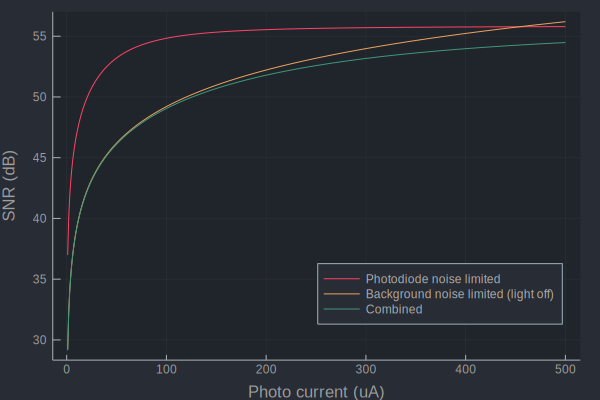

In [66]:
z1 = sqrt.(y1.^2 .+ y3.^2)
z2 = 1.2e-9

plot(x ./ 1e-6, [
    10 .* log10.(x ./ z1),
    10 .* log10.(x ./ z2),
    10 .* log10.(x ./ sqrt.(z1.^2 .+ z2.^2)),
], label=[
    "Photodiode noise limited",
    "Background noise limited (light off)",
    "Combined",
], legend=:bottomright)

xlabel!("Photo current (uA)")
ylabel!("SNR (dB)")